(if you install the datasets it in google drive)

In [1]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Required Libraries**

This section imports all the necessary libraries for data processing, visualization, and building the CNN model.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

**Define Dataset Path**

Here, we define the path to the dataset. You can switch between different datasets by uncommenting the appropriate line.

In [3]:
# Define the path to the dataset
# First dataset
#c = '/content/drive/MyDrive/Final Project/R_C_256/'

# Second dataset (commented out)
c = '/content/drive/MyDrive/Final Project/Augmented18000/'

# Third dataset (commented out)
#c = '/content/drive/MyDrive/Final Project/Augmented data-set/'

**Map Class Names to Numerical Labels**

This dictionary maps class names (Normal, Pothole, Cracks) to numerical labels (0, 1, 2).



In [4]:
# Define a dictionary to map class names to numerical labels
code = {'Normal':0 ,'Pothole':1,'Cracks':2}

# Function to get the class name from the numerical label
def getcode(n) :
    for x , y in code.items() :
        if n == y :
            return x

**Load Training Data**

This section loads the training images and their corresponding labels into X_train and y_train.

In [5]:
# Load training data
X_train = []
y_train = []
for folder in  os.listdir(c +'Training') :
    files = gb.glob(pathname= str( c +'Training//' + folder + '/*.jpg'))
    for file in files:
        image = cv2.imread(file)
        X_train.append(list(image))
        y_train.append(code[folder])

**Load Testing Data**

This section loads the testing images and their corresponding labels into X_test and y_test.

In [6]:
# Load testing data
X_test = []
y_test = []
for folder in  os.listdir(c +'Testing') :
    files = gb.glob(pathname= str(c + 'Testing//' + folder + '/*.jpg'))
    for file in files:
        image = cv2.imread(file)
        X_test.append(list(image))
        y_test.append(code[folder])

**Load Validation Data**

This section loads the validation images and their corresponding labels into X_val and Y_val.

In [7]:
# Load validation data
X_val = []
Y_val = []
for folder in  os.listdir(c +'Validation') :
    files = gb.glob(pathname= str(c + 'Validation//' + folder + '/*.jpg'))
    for file in files:
        image = cv2.imread(file)
        X_val.append(list(image))
        Y_val.append(code[folder])

**Convert Lists to Numpy Arrays**

Convert the lists of images and labels into numpy arrays for compatibility with TensorFlow/Keras.

In [8]:
# Convert lists to numpy arrays for compatibility with TensorFlow/Keras
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_test = np.array(y_test)
Y_val = np.array(Y_val)


print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_val shape  is {X_val.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')
print(f'y_val shape  is {Y_val.shape}')

X_train shape  is (13336, 256, 256, 3)
X_test shape  is (3330, 256, 256, 3)
X_val shape  is (1335, 256, 256, 3)
y_train shape  is (13336,)
y_test shape  is (3330,)
y_val shape  is (1335,)


**Define the CNN Model**

This section defines the architecture of the Convolutional Neural Network (CNN) using Keras.

In [9]:
# Define the Convolutional Neural Network (CNN) model
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
        keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Conv2D(48,kernel_size=(3,3),activation='relu'),
        keras.layers.Conv2D(48,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,
        keras.layers.Dense(120,activation='relu') ,
        keras.layers.Dense(90,activation='relu') ,
        keras.layers.Dense(60,activation='relu') ,
        keras.layers.Dense(30,activation='relu') ,
        keras.layers.Dense(3,activation='softmax') ,
        ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile the model with Adam optimizer and sparse categorical crossentropy loss
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
# Print the model summary
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 123, 123, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 61, 61, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 59, 59, 48)          │          13,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 57, 57, 48)          │          20,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 64)          │          27,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 90)                  │          10,890 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 60)                  │           5,460 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              93 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 199,673 (779.97 KB)

 Trainable params: 199,673 (779.97 KB)

 Non-trainable params: 0 (0.00 B)

None


**Train the Model**

This section trains the model using the training data and validates it using the validation data.

In [12]:
# Define early stopping callback to prevent overfitting
callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

In [13]:
# Train the model
epochs = 50
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=32, validation_data = (X_val,Y_val), callbacks=[callback])

Epoch 1/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.5764 - loss: 0.8753 - val_accuracy: 0.8150 - val_loss: 0.4301
Epoch 2/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8237 - loss: 0.4308 - val_accuracy: 0.8449 - val_loss: 0.3603
Epoch 3/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8651 - loss: 0.3416 - val_accuracy: 0.9041 - val_loss: 0.2571
Epoch 4/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9126 - loss: 0.2363 - val_accuracy: 0.9266 - val_loss: 0.2176
Epoch 5/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9422 - loss: 0.1660 - val_accuracy: 0.9318 - val_loss: 0.1904
Epoch 6/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9495 - loss: 0.1434 - val_accuracy: 0.9401 - val_loss: 0.1768
Epoch 7/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9526 - loss: 0.1350 - val_accuracy: 0.9536 - val_loss: 0.1340
Epoch 8/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9633 - loss: 0.1002 - val_acc

**Evaluate the Model**

Evaluate the model's performance on the test dataset and print the accuracy and loss.

In [14]:
# Evaluate the model on the test dataset
loss,accuracy= KerasModel.evaluate(X_test, y_test)
print('Test accuracy: {:2.2f}%'.format(accuracy*100))
print('Test loss {:2.2f}%'.format(loss*100))

105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9830 - loss: 0.0606
Test accuracy: 97.60%
Test loss 8.61%


In [15]:
ThisModel.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plot Training and Validation Loss**

Visualize the training and validation loss over epochs.

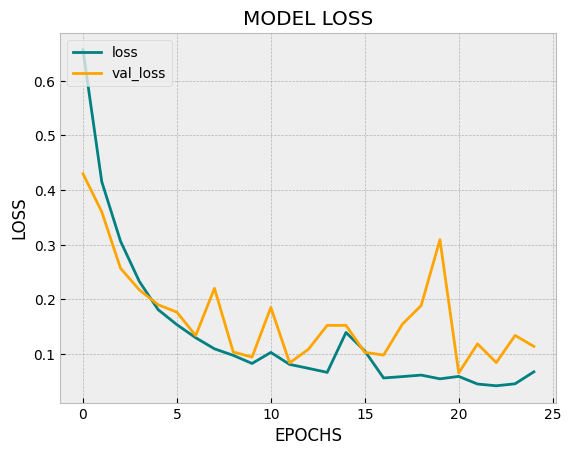

In [16]:
# Plot the training and validation loss
plt.style.use('bmh')
fig=plt.figure()
plt.plot(ThisModel.history['loss'],color='teal', label='loss')
plt.plot(ThisModel.history['val_loss'], color='orange', label='val_loss')
plt.title('MODEL LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend(loc='upper left')
plt.show()

**Plot Training and Validation Accuracy**

Visualize the training and validation accuracy over epochs.

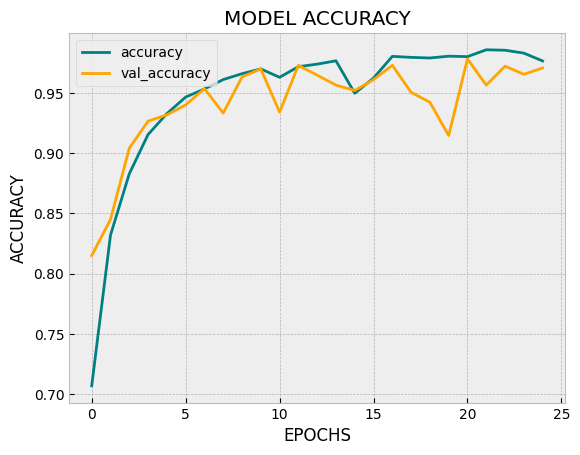

In [17]:
# Plot the training and validation accuracy
plt.style.use('bmh')
fig=plt.figure()
plt.plot(ThisModel.history['accuracy'],color='teal', label='accuracy')
plt.plot(ThisModel.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('MODEL ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.legend(loc='upper left')
plt.show()

**Confusion Matrix**

This section computes and plots the confusion matrix to evaluate the model's performance.

105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


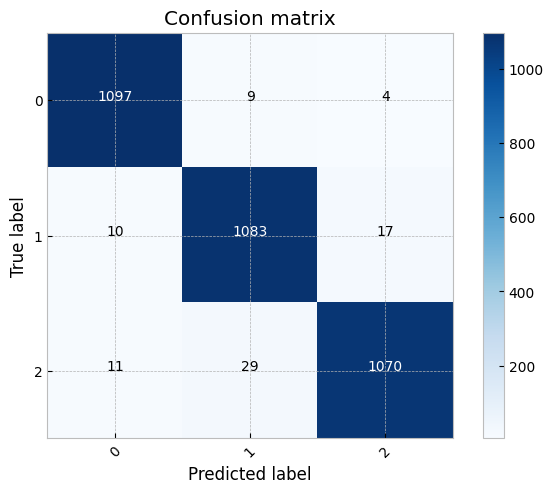

In [18]:
# Function to plot the confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = KerasModel.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)


# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes)


# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))

**Classification Report**

Print the classification report to evaluate precision, recall, and F1-score.

In [19]:
# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1110
           1       0.97      0.98      0.97      1110
           2       0.98      0.96      0.97      1110

    accuracy                           0.98      3330
   macro avg       0.98      0.98      0.98      3330
weighted avg       0.98      0.98      0.98      3330



In [20]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Prediction Shape is (3330, 3)


In [21]:
y_result = KerasModel.predict(X_val)
print('Prediction Shape is {}'.format(y_result.shape))

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Prediction Shape is (1335, 3)


**Visualize Predictions**

Visualize some random predictions from the validation dataset.

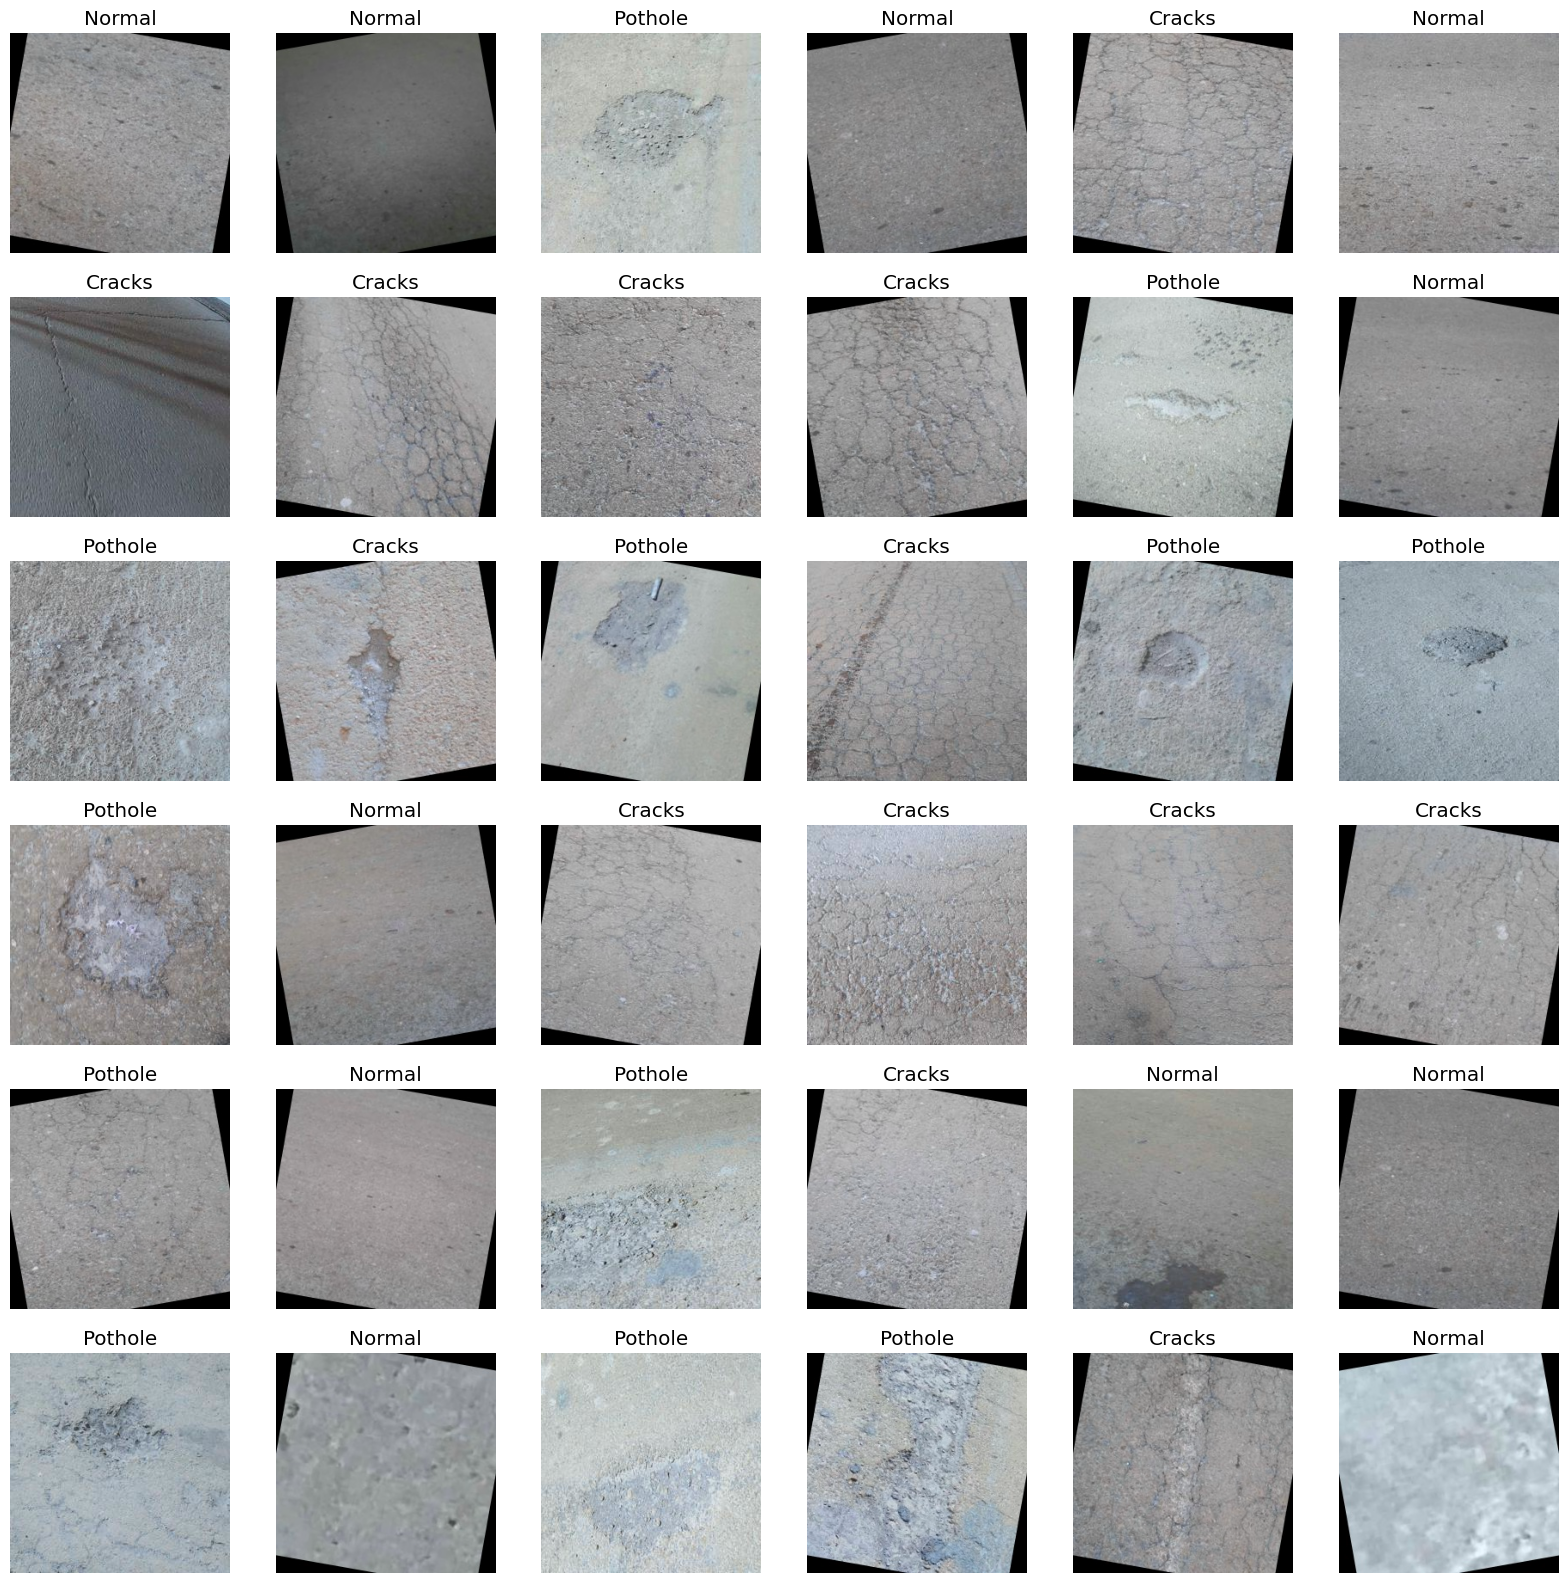

In [22]:
# Visualize some predictions
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_val),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_val[i])
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))

**The End**